In [1]:
import os
import json
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
# Copied from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
with open("../data/language_labels/output.json") as docs_file:
    docs = json.load(docs_file)

In [4]:
y_true = []
y_pred = []
for doc in docs:
    if "manual-entry" not in doc:
        continue
    y_true.append(doc["manual-entry"]["language"] or "unknown")
    y_pred.append(doc["language"] or "unknown")


In [5]:
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
acc

0.8833333333333333

Confusion matrix, without normalization
[[166   0   1   2  15]
 [  0   0   0   0   0]
 [ 13   1  99   0   2]
 [  0   0   0   0   0]
 [  1   0   0   0   0]]


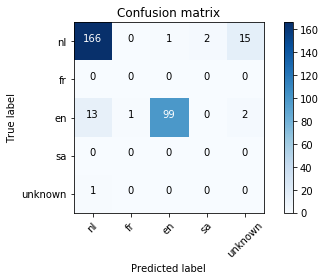

In [6]:
plot_confusion_matrix(cm, ["nl", "fr", "en", "sa", "unknown"])